# Задание 3


In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as  mse

Будем работать с [данными](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset) по больным диабетом. Разбейте выборку на обучающую и тестовую в соотношении 7:3.

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [3]:
feature_names = data.feature_names
print(feature_names)
X = data.data
y = data.target
N, d = X.shape
print( N, d)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
442 10


In [4]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=23)

#### 1. Зависимость коэффициентов регрессии от параметра регуляризации. 
Рассмотрим Ridge регрессию с различным параметром регуляризации $\alpha \in [10^{-3},10^{3}]$. Постройте зависимости каждого из коэффициентов регрессии от параметра $\alpha$. 

In [5]:
alpha = np.logspace(-3, 3, 7)

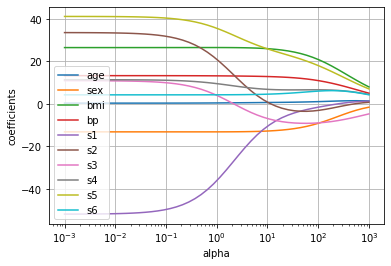

In [7]:
from sklearn.linear_model import Ridge

alpha = np.logspace(-3, 3, 50)

coef = []
for i in alpha:
    ridge_model = Ridge(alpha=i)
    ridge_model.fit(X_train,y_train)
    coef.append(ridge_model.coef_)
coef = np.array(coef).T

for i in range(0,10):
    plt.plot(alpha, coef[i])
    plt.legend(data.feature_names)
    plt.ylabel('coefficients')
    plt.xlabel('alpha')
    plt.xscale('log')
    plt.grid('True')

#### 2. Зависимость числа нулевых коэффициентов от параметра регуляризации. 
Рассмотрим Lasso регрессию с различным параметром регуляризации $\alpha \in [10^{-3},1]$. Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации $\alpha$. 

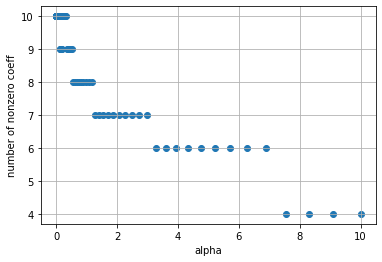

In [10]:
from sklearn.linear_model import Lasso

alpha = np.logspace(-3, 1, 100)

nonzero = []
k = 0
for i in alpha:
    lasso_model = Lasso(alpha = i)
    lasso_model.fit(X_train, y_train)
    for y in lasso_model.coef_:
        if abs(y) <= 1e-3:
            k += 1 
    nonzero.append(len(data.feature_names) - k)
    k = 0

plt.scatter(alpha, nonzero)
plt.xlabel('alpha')
plt.ylabel('number of nonzero coeff')
plt.grid(True)

### Ridge регрессия. 
Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации. Перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$ и используйте кросс-валидацию по 5 фолдам (выборку разбивайте случайным образом). Используйте RidgeCV и KFold из sklearn. 
#### 3. Чему равен оптимальный коэффициент регуляризации? 

In [11]:
sp=KFold(5,shuffle =True)
ridgeCV_model = RidgeCV(alphas = np.logspace(-3,3,100),cv=sp)
ridgeCV_model.fit(X_train, y_train)

print(ridgeCV_model.alpha_)

0.6135907273413176


#### 4. Чему равна среднеквадратичная и средняя абсолютная ошибки на тестовой выборке?

In [12]:
mse(y_test, ridgeCV_model.predict(X_test))

2765.0503272115666

In [13]:
mae(y_test, ridgeCV_model.predict(X_test))

40.99755504260556

#### 5. Распределение ошибок на обучающей выборке. 
Посчитайте ошибки на каждом обучающем объекте: 
$$\delta^{j}_{train}=y_{pred}^{j}-y_{train}^{j},$$
и постройте распределение ошибок. Какой статистике подчиняется полученное распределение?

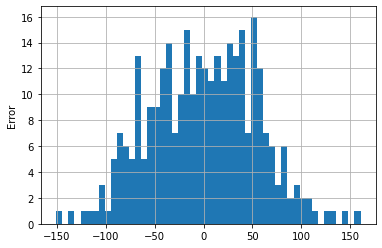

In [15]:
d = ridgeCV_model.predict(X_train) - y_train
plt.hist(d, bins = 50)
plt.ylabel('Error')
plt.grid(True)
  

### Lasso регрессия. 
Подберите на обучающей выборке для Lasso-регрессии коэффициент регуляризации,используя кросс-валидацию как в предыдущей модели. 
#### 6. Как изменилась среднеквадратичная и средняя абсолютная ошибка на тестовой выборке по сравнению с Ridge регрессией? 

In [16]:
from sklearn.linear_model import LassoCV


lassoCV_model = LassoCV(alphas = np.logspace(-3, 3, 100), cv = sp)
lassoCV_model.fit(X_train, y_train)

print(lassoCV_model.alpha_)
print(abs(mse(y_test, lassoCV_model.predict(X_test)) -  mse(y_test, ridgeCV_model.predict(X_test))), abs(mae(y_test, lassoCV_model.predict(X_test)) - mae(y_test, ridgeCV_model.predict(X_test))))



0.001
13.111626457711736 0.24530664834789917


#### 7. Постройте зависимость среднеквадратичной ошибки от значения параметра регуляризации. 

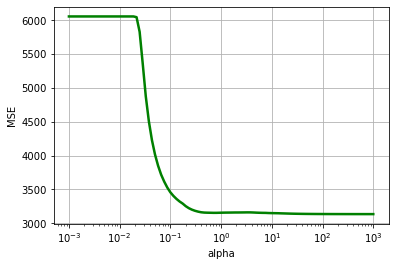

In [18]:
alpha = np.logspace(-3, 3, 100)
MSE = []
for i in lassoCV_model.mse_path_:
    MSE.append(np.mean(i))
plt.plot(alpha, MSE, lw = 2.5, color = 'g')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.grid(True)
